# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить "матричным" способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

2 5 1
1 -10 3
x1 =  [1.]   x2 =  [-0.2]


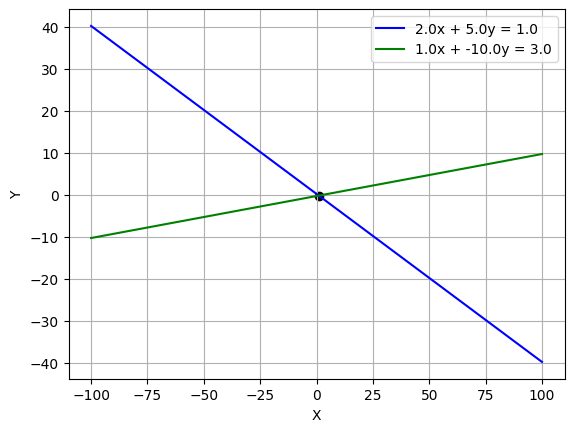

In [63]:
import numpy as np
import matplotlib.pyplot as plt

a11,a12,b1=map(float,input().split())
a21,a22,b2=map(float,input().split())

A = np.array([[a11, a12],[a21,a22]])
B = np.array([[b1],[b2]])

det = np.linalg.det(A)
tmp = False
if det:
    A = np.linalg.inv(A)
    C = A @ B
    x1 = C[0]
    x2 = C[1]
    print('x1 = ', x1,'  x2 = ', x2)
    tmp = True
else: 
    if (np.linalg.det([[b1, b2], [a12, a22]]) != 0) and (np.linalg.det([[a11, a21], [b1, b2]]) != 0):
        print('Решений нет')
    else:
        print('Бесконечно много решений')
space = np.linspace(-100, 100, 2)
if a12 != 0:
    y1 = lambda x: (b1 - a11 * x) / a12
    plt.plot(space, y1(space), c = 'blue', label = str(a11) + 'x + ' + str(a12) +'y = '+ str(b1))
elif a11 != 0:
    plt.axvline(x = b1/a11, ymin=-100, ymax=100, label = str(a11) + 'x + ' + str(a12) +'y = '+ str(b1))
if a22 != 0:
    y2 = lambda x: (b2 - a21 * x) / a22
    plt.plot(space, y2(space), c = 'green', label = str(a21) + 'x + ' + str(a22) +'y = '+ str(b2))
elif a21 != 0:
    plt.axvline(x = b2/a21, ymin=-100, ymax=100, label = str(a21) + 'x + ' + str(a22) +'y = '+ str(b2))
if tmp:
    plt.scatter(x1, x2, c = 'black')
plt.grid(True)
plt.xlabel(u'X')
plt.ylabel(u'Y')
plt.legend()
plt.show()

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

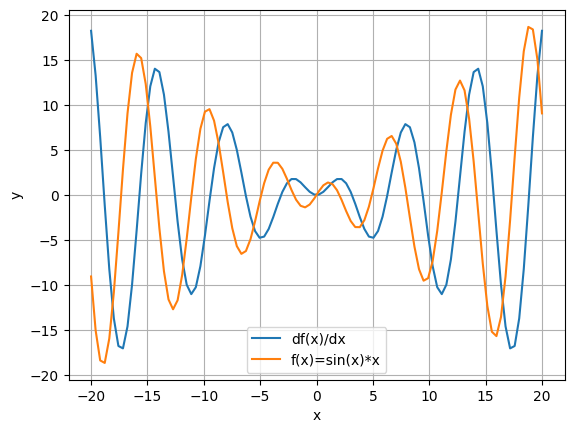

In [64]:
import torch
import matplotlib.pyplot as plt


x = torch.linspace(-20, 20, 100, requires_grad = True)
Y = x * torch.sin(x)

y = torch.sum(x * torch.sin(x))
y.backward()
plt.plot(x.detach(), Y.detach(), label = 'df(x)/dx')
plt.plot(x.detach(), x.grad.detach(), label = 'f(x)=sin(x)*x')
plt.grid(True)
plt.xlabel(u'x')
plt.ylabel(u'y')
plt.legend()

plt.show()